In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/student-data-encoded.csv")

In [ ]:
features = [x for x in df.columns if x not in 'is_cleared']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df[features], df['is_cleared'], train_size = 0.7, random_state = 42)

In [ ]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 350
validation samples: 150
target proportion: 1.0771


In [ ]:
forest = RandomForestClassifier()

In [ ]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
print("Accuracy on training set:{:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_val, y_val)))


Accuracy on training set:1.000
Accuracy on test set: 0.360


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


In [ ]:
forest = RandomForestClassifier(max_depth = 30, min_samples_leaf = 4, min_samples_split = 2, n_estimators = 200)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=200)

In [ ]:
train_accuracy = forest.score(X_train, y_train)
test_accuracy = forest.score(X_val, y_val)


print(f"Accuracy on training set: {train_accuracy:.3f}")
print(f"Accuracy on test set: {test_accuracy:.3f}")

Accuracy on training set: 0.997
Accuracy on test set: 0.273


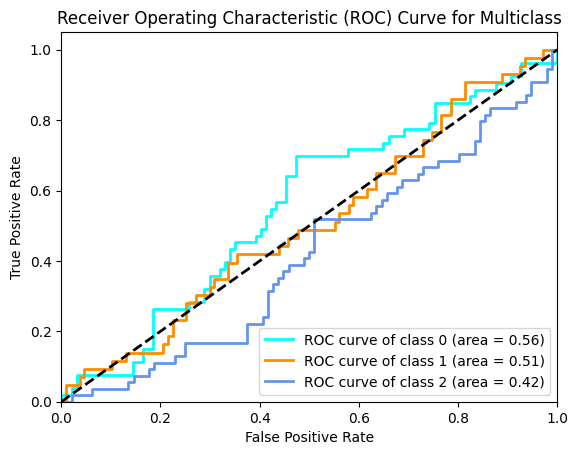

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output
classes = np.unique(y_train)  # Assuming y_train contains all the classes
y_val_binarized = label_binarize(y_val, classes=classes)
n_classes = y_val_binarized.shape[1]

# Predict probabilities for X_val
y_scores = forest.predict_proba(X_val)

# Plot ROC curve for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']  # Add more colors if you have more classes
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
             label=f'ROC curve of class {classes[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_pred = forest.predict(X_val)
precision = precision_score(y_val, y_pred, average='macro') # Set average to handle multiclass
recall = recall_score(y_val, y_pred, average='macro') # Set average to handle multiclass
f1 = f1_score(y_val, y_pred, average='macro') # Set average to handle multiclass

# Print the classification report
report = classification_report(y_val, y_pred)

print(f"Accuracy on training set: {train_accuracy:.3f}")
print(f"Accuracy on test set: {test_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("\nClassification Report:\n", report)

Accuracy on training set: 0.991
Accuracy on test set: 0.333
Precision: 0.355
Recall: 0.338
F1 Score: 0.325

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.19      0.26        53
           1       0.28      0.42      0.34        43
           2       0.35      0.41      0.38        54

    accuracy                           0.33       150
   macro avg       0.36      0.34      0.33       150
weighted avg       0.36      0.33      0.32       150



In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("Accuracy on training set:{:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_val, y_val)))

Accuracy on training set:1.000
Accuracy on test set: 0.313


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15, min_samples_leaf = 2, min_samples_split = 2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2)

In [ ]:
print("Accuracy on training set:{:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_val, y_val)))

Accuracy on training set:0.906
Accuracy on test set: 0.293


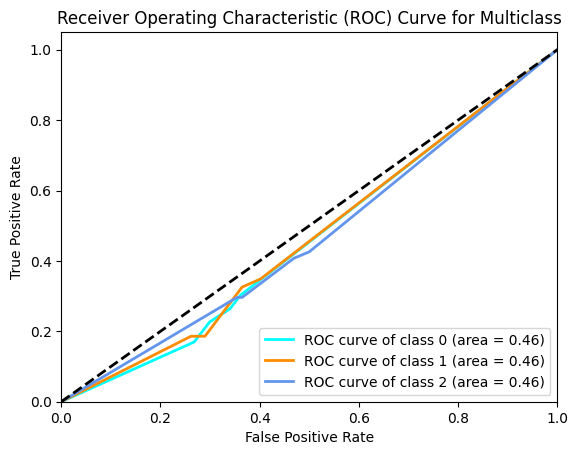

In [ ]:
classes = np.unique(y_train)  # Assuming y_train contains all the classes
y_val_binarized = label_binarize(y_val, classes=classes)
n_classes = y_val_binarized.shape[1]

# Predict probabilities for X_val
y_scores = tree.predict_proba(X_val)

# Plot ROC curve for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']  # Add more colors if you have more classes
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
             label=f'ROC curve of class {classes[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = tree.predict(X_val)

# Calculate precision, recall, and F1 score, specifying average='macro' for multiclass
precision = precision_score(y_val, y_pred, average='macro') # Use 'macro' for multiclass
recall = recall_score(y_val, y_pred, average='macro')       # Use 'macro' for multiclass
f1 = f1_score(y_val, y_pred, average='macro')             # Use 'macro' for multiclass

# Print the classification report
report = classification_report(y_val, y_pred)

# Print accuracies
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_val, y_val)))

# Print precision, recall, and F1 score
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Print the detailed classification report
print("\nClassification Report:\n", report)

Accuracy on training set: 0.909
Accuracy on test set: 0.333
Precision: 0.337
Recall: 0.338
F1 Score: 0.333

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.36      0.38        53
           1       0.29      0.40      0.33        43
           2       0.32      0.26      0.29        54

    accuracy                           0.33       150
   macro avg       0.34      0.34      0.33       150
weighted avg       0.34      0.33      0.33       150



<ipython-input-31-acea63f24ba9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Training Set', 'Validation Set'], y=[train_accuracy, val_accuracy], palette=['blue', 'red'])


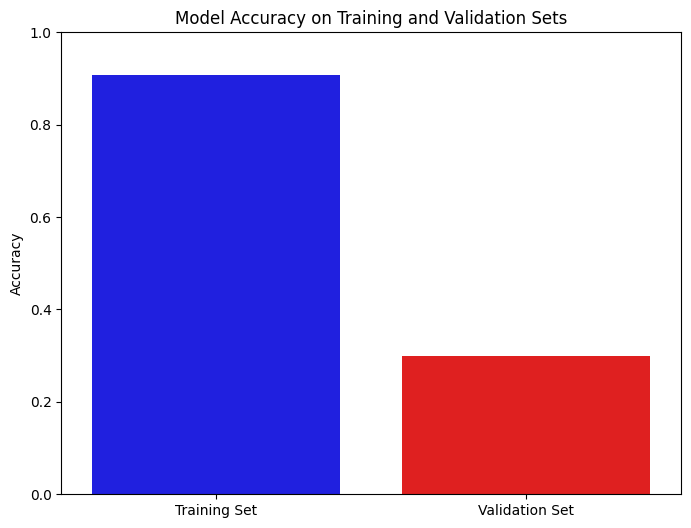

In [ ]:
import seaborn as sns
y_train_preds = tree.predict(X_train)
y_val_preds = tree.predict(X_val)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_preds)
val_accuracy = accuracy_score(y_val, y_val_preds)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=['Training Set', 'Validation Set'], y=[train_accuracy, val_accuracy], palette=['blue', 'red'])
plt.title('Model Accuracy on Training and Validation Sets')
plt.ylabel('Accuracy')
plt.ylim((0, 1))  # Ensures the y-axis starts at 0 and ends at 1
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

voting_clf = VotingClassifier(
estimators=[
('lr', LogisticRegression(random_state=42)),
('rf', RandomForestClassifier(random_state=42)),
('svc', SVC(random_state=42))
]
)
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
  print(name, "=", clf.score(X_val, y_val))

lr = 0.4994
rf = 0.506
svc = 0.4982


In [ ]:
voting_clf.score(X_val, y_val)

0.4992333333333333

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the individual models
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)

# Define the parameter grids for each model
lr_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rf),
        ('svc', svc)
    ],
    voting='soft'
)

# Create the grid search object
grid_search = GridSearchCV(
    estimator=voting_clf,
    param_grid={
        'lr__C': lr_params['C'],
        'lr__penalty': lr_params['penalty'],
        'rf__n_estimators': rf_params['n_estimators'],
        'rf__max_depth': rf_params['max_depth'],
        'svc__C': svc_params['C'],
        'svc__kernel': svc_params['kernel']
    },
    cv=3,
    scoring='accuracy',
    n_jobs = -1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
max_samples=100, oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
bag_clf.oob_score_

0.5017

In [ ]:
y_pred = bag_clf.predict(X_val)
accuracy_score(y_val, y_pred)

0.5014